In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [4]:
data = pd.read_csv('weather.csv')
data.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18676 entries, 0 to 18675
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18676 non-null  int64  
 1   Date           18676 non-null  object 
 2   Location       18676 non-null  object 
 3   MinTemp        18354 non-null  float64
 4   MaxTemp        18500 non-null  float64
 5   Rainfall       18467 non-null  float64
 6   Evaporation    6676 non-null   float64
 7   Sunshine       4094 non-null   float64
 8   WindGustDir    15268 non-null  object 
 9   WindGustSpeed  15268 non-null  float64
 10  WindDir9am     15950 non-null  object 
 11  WindDir3pm     16989 non-null  object 
 12  WindSpeed9am   18135 non-null  float64
 13  WindSpeed3pm   17458 non-null  float64
 14  Humidity9am    18320 non-null  float64
 15  Humidity3pm    17629 non-null  float64
 16  Pressure9am    15273 non-null  float64
 17  Pressure3pm    15268 non-null  float64
 18  Cloud9

In [6]:
print(data.describe())

         Unnamed: 0       MinTemp       MaxTemp      Rainfall  Evaporation  \
count  18676.000000  18354.000000  18500.000000  18467.000000  6676.000000   
mean    9337.500000     12.568170     24.433254      2.552385     6.273922   
std     5391.441149      6.119384      6.549177      9.849170     5.471387   
min        0.000000     -3.300000      6.800000      0.000000     0.000000   
25%     4668.750000      7.800000     19.400000      0.000000     2.800000   
50%     9337.500000     12.800000     24.000000      0.000000     5.000000   
75%    14006.250000     17.600000     28.800000      0.400000     8.200000   
max    18675.000000     29.700000     47.300000    371.000000    86.200000   

          Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm   Humidity9am  \
count  4094.000000   15268.000000  18135.000000  17458.000000  18320.000000   
mean      8.307987      36.789232     11.857789     15.865735     68.538646   
std       3.753945      12.741505      8.809155      8.90256

In [7]:
data.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [8]:
data.dtypes

Unnamed: 0         int64
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [9]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
# Handle missing values
data.dropna(inplace=True)


In [11]:
# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [12]:
# Convert categorical columns to numerical using label encoding
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [13]:
# Split the dataset into features and target variable
X = data.drop('RainTomorrow', axis=1)  # Features
y = data['RainTomorrow']  # Target variable

In [14]:
# Normalize numeric features
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm', 'RISK_MM']
X[numeric_cols] = (X[numeric_cols] - X[numeric_cols].mean()) / X[numeric_cols].std()

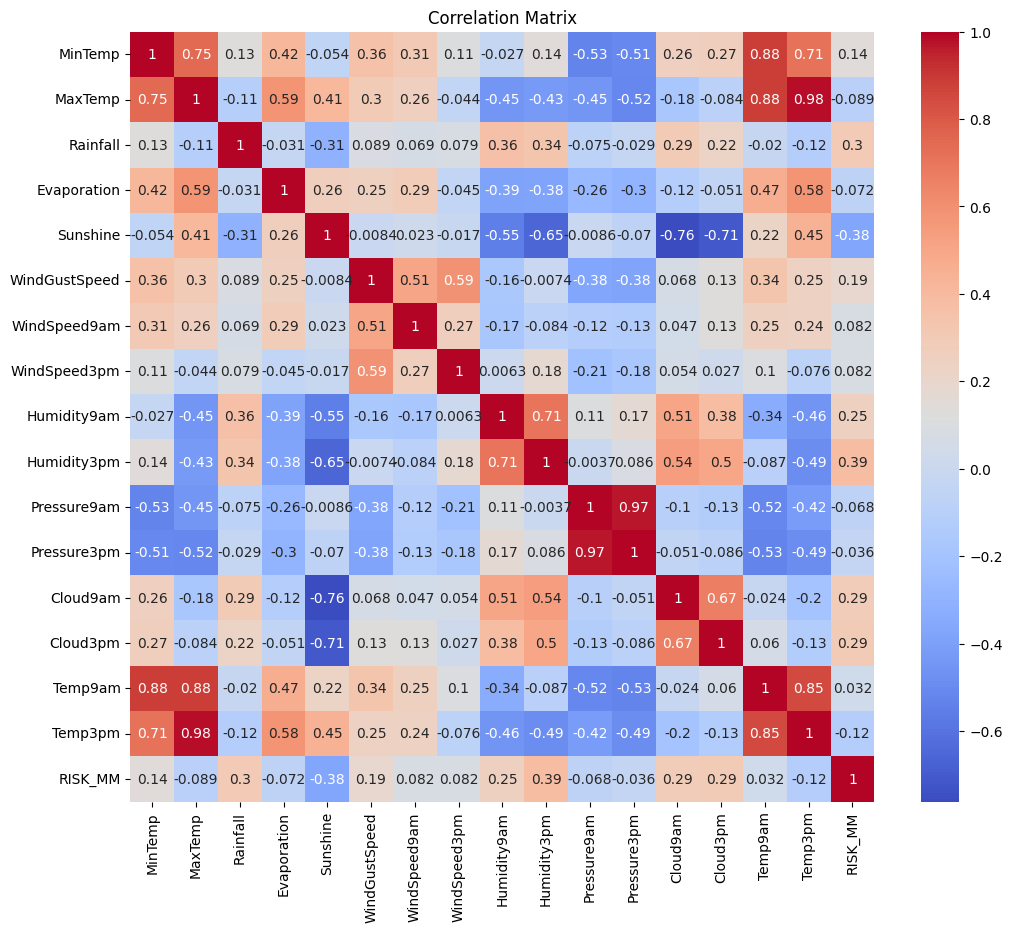

In [15]:
# Correlation matrix
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm', 'RISK_MM']

numeric_data = data[numeric_cols]
corr_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

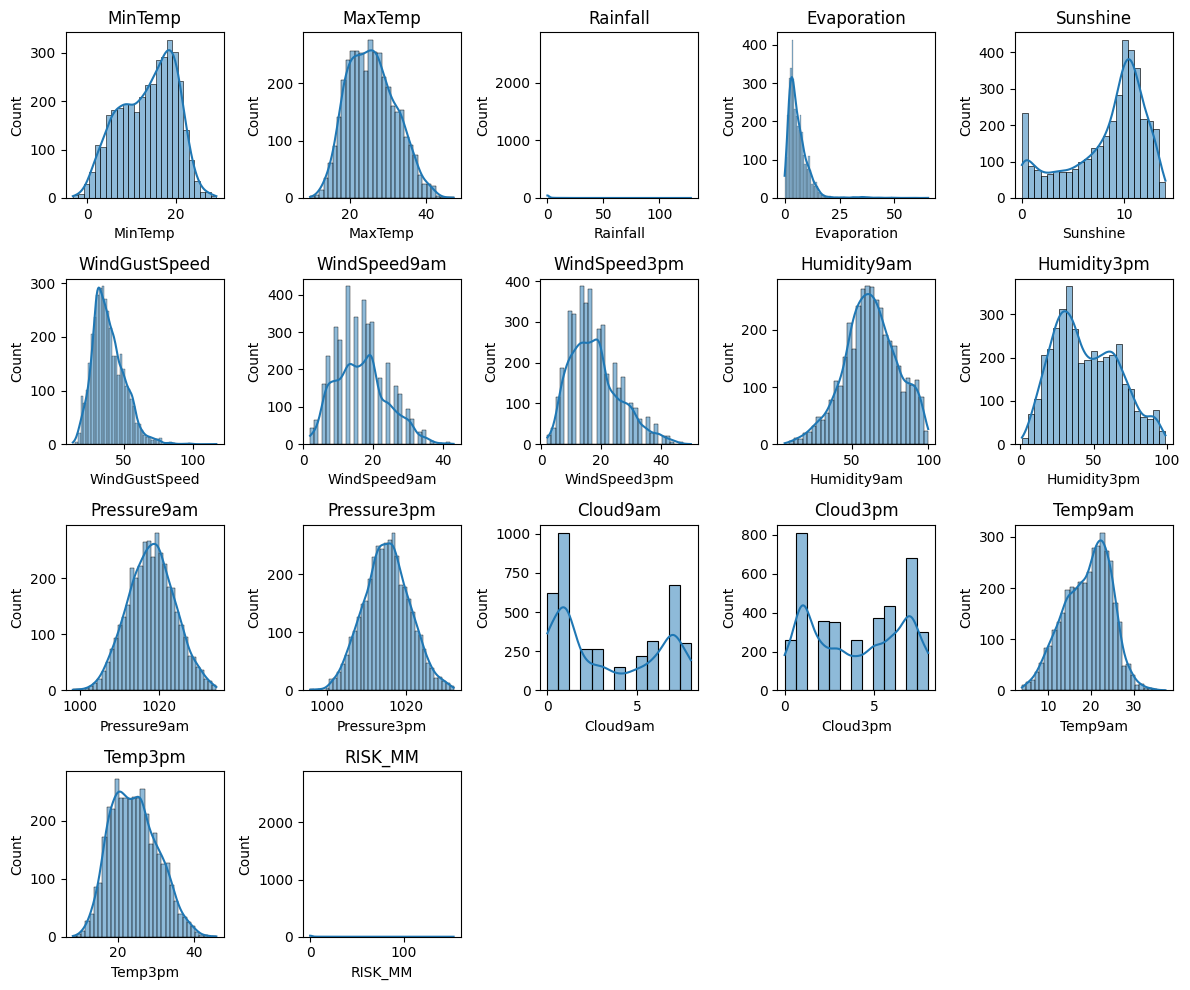

In [16]:
# Distribution of numeric features
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(4, 5, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
# Create new features
# Extract year, month, and day from the 'Date' column
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Day'] = pd.to_datetime(data['Date']).dt.day

In [18]:
# Calculate the difference between max and min temperature
data['TempDiff'] = data['MaxTemp'] - data['MinTemp']

In [19]:
# Perform imputation for missing values
imputer = SimpleImputer(strategy='mean')
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
                'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                'Temp9am', 'Temp3pm', 'RISK_MM']
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

In [20]:
# Log transform skewed features
skewed_features = ['Rainfall', 'Evaporation']
data[skewed_features] = np.log1p(data[skewed_features])

# Drop unnecessary columns
data.drop([ 'Date'], axis=1, inplace=True)

# Encode categorical variables
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
# Split the dataset into features and target variable
X = data.drop('RainTomorrow', axis=1)  # Features
y = data['RainTomorrow']  # Target variable

In [21]:
# Perform imputation for missing values in features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [22]:
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [23]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

In [24]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Confusion Matrix:
[[636   0]
 [  0 130]]
